### Importar lista de productos

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  as mlp
import numpy as np
import locale
import math

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from IPython.display import display
locale.setlocale(locale.LC_ALL, 'es_MX.UTF-8')
mlp.style.use('seaborn')


df = pd.read_csv(r'dataset.csv', decimal=".", thousands=",")
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Vendedor,Doc,Fecha,Nombres,Unidades,Unitario Venta,Ventas,Costo Unitario,Total Costo,Margen,PorMargen,Codigo,Descripcion
0,YOLEISY YOHANA POCHEZ PAREJO,FV R 11578,2020-07-01,Cliente General,4.0,2016.81,8067.23,1445.19,5780.78,2286.45,0.28,10012541,DISCO SEPARADOR CLUTCH
1,NaN,FV R 11578,2020-07-01,Cliente General,1.0,15168.07,15168.07,12132.58,12132.58,3035.48,0.20,10012780,CADENILLA DISTRIBUCION
2,NaN,FV R 11578,2020-07-01,Cliente General,1.0,12184.87,12184.87,8585.35,8585.35,3599.53,0.30,10012919,BANDA FRENO DEL Y TRAS
3,NaN,FV R 11578,2020-07-01,Cliente General,2.0,11344.54,22689.08,8585.35,17170.70,5518.38,0.24,10012919,BANDA FRENO DEL Y TRAS
4,NaN,FV R 11578,2020-07-01,Cliente General,1.0,17983.19,17983.19,13016.81,13016.81,4966.38,0.28,10015076,KIT GUIAS CADENILLA DIST


### Seleccionar producto

In [203]:
prod_id = '10012919'
ps = df.loc[df['Codigo'] == prod_id] 
prod_name = ps['Descripcion'].unique()[0].strip()
print('Producto seleccionado: ', prod_name)
first = ps.iloc[0]['Fecha']
last = ps.iloc[-1]['Fecha']
print(first)
print(last)
display(ps.head())
display(ps.describe())

Producto seleccionado:  BANDA FRENO DEL Y TRAS
2020-07-01 00:00:00
2020-10-22 00:00:00


,Vendedor,Doc,Fecha,Nombres,Unidades,Unitario Venta,Ventas,Costo Unitario,Total Costo,Margen,PorMargen,Codigo,Descripcion
2,NaN,FV R 11578,2020-07-01,Cliente General,1.0,12184.87,12184.87,8585.35,8585.35,3599.53,0.30,10012919,BANDA FRENO DEL Y TRAS
3,NaN,FV R 11578,2020-07-01,Cliente General,2.0,11344.54,22689.08,8585.35,17170.70,5518.38,0.24,10012919,BANDA FRENO DEL Y TRAS
42,NaN,FV R 11579,2020-08-01,Cliente General,1.0,11176.47,11176.47,8585.35,8585.35,2591.12,0.23,10012919,BANDA FRENO DEL Y TRAS
43,NaN,FV R 11579,2020-08-01,Cliente General,1.0,11176.47,11176.47,8585.35,8585.35,2591.12,0.23,10012919,BANDA FRENO DEL Y TRAS
68,NaN,FV R 11580,2020-09-01,Cliente General,1.0,10924.37,10924.37,8585.35,8585.35,2339.02,0.21,10012919,BANDA FRENO DEL Y TRAS


,Unidades,Unitario Venta,Ventas,Costo Unitario,Total Costo,Margen,PorMargen
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.298969,11578.791443,15114.051649,8409.220309,10917.697216,4196.358041,0.204124
std,0.597999,1486.540393,7465.656472,69.067272,5006.865384,2847.248805,0.681869
min,1.000000,1134.450000,1134.450000,8383.470000,8383.470000,-7249.010000,-6.390000
25%,1.000000,11575.630000,11764.710000,8383.470000,8383.470000,3192.160000,0.270000
50%,1.000000,12184.870000,12184.870000,8383.470000,8383.470000,3801.410000,0.310000
75%,1.000000,12184.870000,13613.450000,8383.470000,8622.960000,4661.640000,0.310000
max,4.000000,13613.450000,48739.500000,8622.960000,33533.860000,15205.630000,0.380000


### Lista de precios de venta

In [204]:
precio_venta_list = ps.groupby(ps['Unitario Venta'], as_index=False).aggregate({
    'Unidades': 'sum',
    'PorMargen': 'mean'
})
max_venta_margen = precio_venta_list['PorMargen'].describe()['max']
max_venta_precio_row = precio_venta_list[precio_venta_list['PorMargen'] == max_venta_margen]
max_venta_precio_margen = max_venta_precio_row['Unitario Venta'].values[0]
print('Precio mayor de rendimiento', max_venta_precio_margen)

avg_precio_venta = precio_venta_list['Unitario Venta'].describe()['mean']
print('Precio promedio de venta:',avg_precio_venta)

max_sales_unidades = precio_venta_list['Unidades'].describe()['max']
max_price_sales_unidades = precio_venta_list[precio_venta_list['Unidades'] == max_sales_unidades]
# print(max_price_sales_unidades)
max_price_sale = max_price_sales_unidades['Unitario Venta']
max_price_sale = max_price_sale[max_price_sale.index[0]]
print('Precio venta más vendido:', max_price_sale)

max_sales_margen = precio_venta_list['PorMargen'].describe()['max']
max_price_sales_margen = precio_venta_list[precio_venta_list['PorMargen'] == max_sales_margen]
# print(max_price_sales_margen)
max_price_margen_sale = max_price_sales_margen['Unitario Venta']
max_price_margen_sale = max_price_margen_sale[max_price_margen_sale.index[0]]
print('Precio de rendimiento mayor de ventas:', max_price_margen_sale)

avg_margen = precio_venta_list['PorMargen'].describe()['mean']
print('Rendimiento promedio:', avg_margen)

display(precio_venta_list)
display(precio_venta_list.describe())

Precio mayor de rendimiento 13445.38
Precio promedio de venta: 10508.229583333334
Precio venta más vendido: 12184.87
Precio de rendimiento mayor de ventas: 13445.38
Rendimiento promedio: -0.06801328502415455


,Unitario Venta,Unidades,PorMargen
0,1134.45,1.0,-6.390000
1,7142.86,1.0,-0.170000
2,7563.03,2.0,-0.110000
3,8205.88,1.0,-0.020000
4,8403.36,1.0,-0.030000
5,9915.97,1.0,0.150000
6,10357.14,4.0,0.190000
7,10420.17,1.0,0.200000
8,10588.24,1.0,0.210000
9,10714.29,2.0,0.220000


,Unitario Venta,Unidades,PorMargen
count,24.000000,24.000000,24.000000
mean,10508.229583,5.250000,-0.068013
std,2622.448020,13.035904,1.354536
min,1134.450000,1.000000,-6.390000
25%,10246.847500,1.000000,0.180000
50%,11071.430000,1.000000,0.235000
75%,11869.750000,3.250000,0.291087
max,13613.450000,64.000000,0.380000


The Linear regression score on training data is  0.68
precio de venta sugerido 10364.03767941675


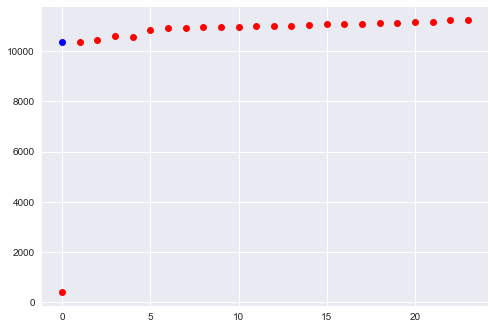

In [207]:
saleX_train = precio_venta_list[['PorMargen']]
saleY_train = precio_venta_list['Unitario Venta']
saleX_test = precio_venta_list[['PorMargen']]
saleY_test = precio_venta_list['Unitario Venta']

sc_X = StandardScaler()

saleX_train = sc_X.fit_transform(saleX_train.values)
saleX_test = sc_X.transform(saleX_test)

# Entrenación
reg = LinearRegression().fit(saleX_train, saleY_train)
print("The Linear regression score on training data is ", round(reg.score(saleX_train, saleY_train),2))

predict = reg.predict(saleX_test)
predict_sale_sug = reg.predict([[avg_margen]])
print('precio de venta sugerido', predict_sale_sug[0])

plt.plot(predict, 'ro', predict_sale_sug, 'bo')
plt.show()

### Lista de precios de compra

In [12]:
precio_compra_list = ps.groupby(ps['Costo Unitario'], as_index=False).aggregate({
    'Unidades': 'sum',
    'PorMargen': 'mean',
    'Unitario Venta': 'mean'
})


avg_buy_price = precio_compra_list['Costo Unitario'].describe()['mean']
print('Precio promedio de compra', avg_buy_price)

avg_buy_margen = precio_compra_list['PorMargen'].describe()['mean']
print('Rendimiento promedio de compra',avg_buy_margen)

print('avg_buy_price:', precio_compra_list.describe()['Unitario Venta']['mean'])
display(precio_compra_list)
display(precio_compra_list.describe())

Precio promedio de compra 8530.593333333332
Rendimiento promedio de compra 0.19376470588235295
avg_buy_price: 11112.341568627447


,Costo Unitario,Unidades,PorMargen,Unitario Venta
0,8383.47,113.0,0.199294,11605.930706
1,8585.35,11.0,0.262000,11647.059000
2,8622.96,2.0,0.120000,10084.035000


,Costo Unitario,Unidades,PorMargen,Unitario Venta
count,3.000000,3.000000,3.000000,3.000000
mean,8530.593333,42.000000,0.193765,11112.341569
std,128.792797,61.652251,0.071161,890.777011
min,8383.470000,2.000000,0.120000,10084.035000
25%,8484.410000,6.500000,0.159647,10844.982853
50%,8585.350000,11.000000,0.199294,11605.930706
75%,8604.155000,62.000000,0.230647,11626.494853
max,8622.960000,113.000000,0.262000,11647.059000


The Linear regression score on training data is  0.05
precio sugerido de compra 8526.26851166824


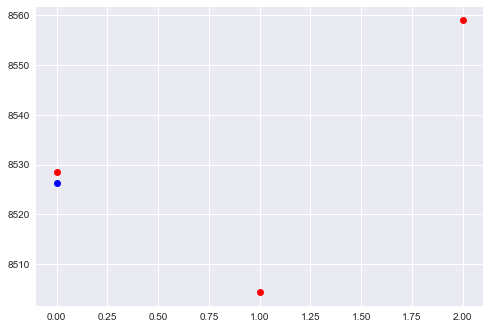

In [13]:
buyX_train = precio_compra_list[['PorMargen']]
buyY_train = precio_compra_list['Costo Unitario']
buyX_test = precio_compra_list[['PorMargen']]
buyY_test = precio_compra_list['Costo Unitario']

sc_X = StandardScaler()

buyX_train = sc_X.fit_transform(buyX_train.values)
buyX_test = sc_X.transform(buyX_test)

# Entrenación
reg = LinearRegression().fit(buyX_train, buyY_train)
print("The Linear regression score on training data is ", round(reg.score(buyX_train, buyY_train),2))

predict = reg.predict(buyX_test)
predict_buy_sug = reg.predict([[avg_buy_margen]])
predict_buy_sug = predict_buy_sug[0]
print('precio sugerido de compra',  predict_buy_sug)

plt.plot(predict, 'ro', predict_buy_sug, 'bo')
plt.show()

### Lista de ventas mensuales

Timestamp('2020-01-09 00:00:00')

<Figure size 864x360 with 0 Axes>

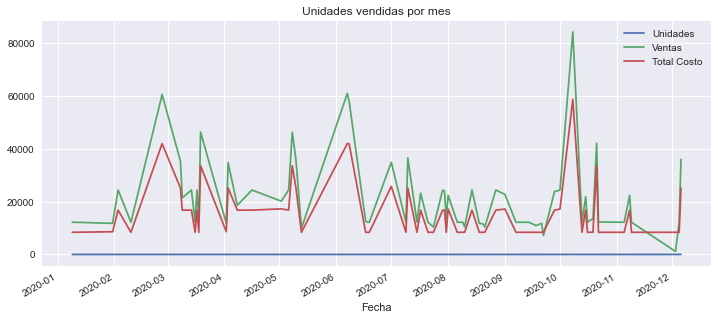

In [210]:
sales_timeline = ps.groupby(ps['Fecha'], as_index=True).aggregate({
        'Unidades': 'sum', 
        'Ventas': 'sum',
        'Total Costo': 'sum',
    })
df_dates = sales_timeline.groupby(
        sales_timeline.index, 
        as_index=True).aggregate({
            'Unidades': 'sum' 
        })
plt.figure(figsize=(12,5))
display(sales_timeline.iloc[0].name)

sales_timeline.plot( figsize=(12, 5), title="Unidades vendidas por mes");
plt.savefig('unidades.jpg', format="jpg")

normalized dataframe created


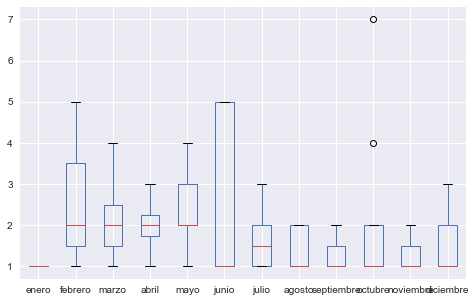

In [40]:
# GROUP DATA BY MONTHS
product_dataset = sales_timeline['Unidades']
months = product_dataset.groupby(pd.Grouper(freq='M'))

# GET SOME DATA
indexes = []
datas = []
lengths = []
sales = []
for name, group in months:
    groupSales = []
    for value in group.values:
        if value != 0:
            groupSales.append(value)
    sales.append(len(groupSales))
    datas.append(group.values)
    lengths.append(len(group.values))
    indexes.append(name.strftime('%B'))

maxlength = max(lengths)
transactions = np.sum(sales)
avg_mes = transactions/len(months)

# NORMALIZE DATAFRAME
normalized_df = pd.DataFrame()
for mes, (name, group) in zip(indexes, months):
    values = group.to_list()
    less = maxlength - len(group.values) 
    
    for zero in range(less):
        values.append(zero * 0)

    normalized_df[mes] = pd.Series(values)
        

print('normalized dataframe created')
# MAKE CHARTS IMAGES
months_box = normalized_df.replace(0,np.nan )
boxes = months_box.boxplot(figsize=(8,5))
boxes.figure.savefig("boxes.jpg", format="jpg")

Meses con mayor ventas: ['octubre']
Mes con mayor rendimiento: ['febrero']


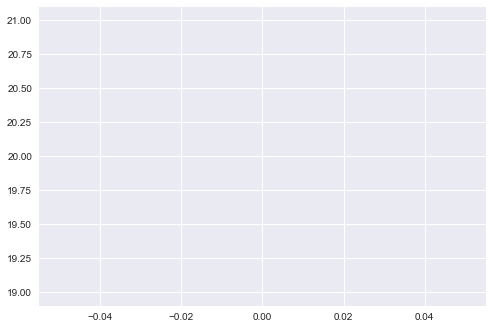

In [23]:
ps_dates = ps
ps_dates = ps_dates.set_index('Fecha')
meses_list = ps_dates.groupby(pd.Grouper(freq="M")).aggregate({
    'Unidades': 'sum',
    'Unitario Venta': 'mean',
    'Costo Unitario': 'mean',
    'Ventas': 'sum',
    'Total Costo': 'sum',
    'Margen': 'sum',
    'PorMargen': 'mean',
}).dropna()

max_sales = meses_list['Unidades'].describe()['max']
max_sales_month = meses_list[meses_list['Unidades'] == max_sales]
sales_months = []
for month, row in max_sales_month.iterrows():
    str_month = month.strftime('%B')
    sales_months.append(str_month)
print('Meses con mayor ventas:', sales_months)


max_margen = meses_list['PorMargen'].describe()['max']
max_margen_month = meses_list[meses_list['PorMargen'] == max_margen]
margen_months = []
for month, row in max_margen_month.iterrows():
    str_month = month.strftime('%B')
    margen_months.append(str_month)
print('Mes con mayor rendimiento:', margen_months)

plt.plot();

# display(meses_list)
# display(meses_list.describe())

The Linear regression score on training data is  0.13


None

Se venderán 24 unidades en 2 meses


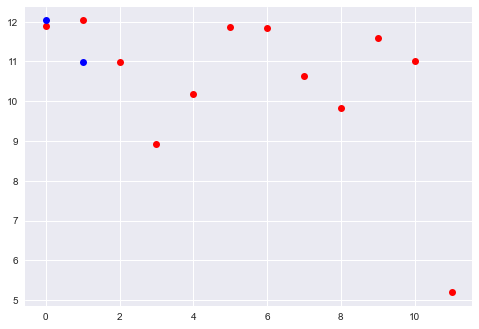

In [15]:
import json, codecs

unitsX_train = meses_list[['Unitario Venta']]
unitsY_train = meses_list['Unidades']
unitsX_test = meses_list[['Unitario Venta']]
unitsY_test = meses_list['Unidades']

sc_X = StandardScaler()

unitsX_train = sc_X.fit_transform(unitsX_train)
unitsX_test = sc_X.transform(unitsX_test)

# Entrenación
reg = LinearRegression().fit(unitsX_train, unitsY_train)
print("The Linear regression score on training data is ", round(reg.score(unitsX_train, unitsY_train),2))

# Basado en la cantidad de meses obtenidos, se ajusta para predecir al menos 1 año
repeats = (12 - len(unitsX_test)) / int(len(unitsX_test)) 
repeats = math.ceil(repeats) + 1
unitsX_test = np.tile(unitsX_test,(repeats, 1))

# meses que el usuario quiere conocer en predicción
months_req = 2
months_required = unitsX_test[1:months_req +1 ]

predict_year=reg.predict(unitsX_test)
b = predict_year.tolist()
year_json = json.dump(b, codecs.open("year_predictions.json", "w"))
display(year_json)
predict_months = reg.predict(months_required)

cantidad_predicted = math.ceil(predict_months.sum())
print('Se venderán', cantidad_predicted, 'unidades en', months_req, 'meses')
plt.plot(predict_year, 'ro', predict_months, 'bo')
plt.show()

The Linear regression score on training data is  0.05


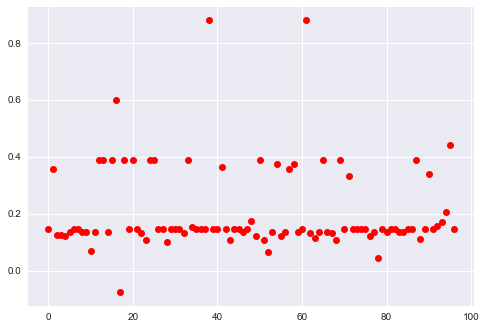

In [16]:

prod_list = ps[['Fecha', 'Unidades', 'Ventas', 'Total Costo', 'Margen', 'PorMargen']]

picaX_train = prod_list[['Ventas']]
picaY_train = prod_list['PorMargen']
picaX_test = prod_list[['Ventas']]
picaY_test = prod_list['PorMargen']

sc_X = StandardScaler()

picaX_train = sc_X.fit_transform(picaX_train.values)
picaX_test = sc_X.transform(picaX_test)

# Entrenación
reg = LinearRegression().fit(picaX_train, picaY_train)
print("The Linear regression score on training data is ", round(reg.score(picaX_train, picaY_train),2))

predict = reg.predict(picaX_test)
# predict_sug = reg.predict([[avg_margen]])
# print(predict_sug)

plt.plot(predict, 'ro')
plt.show()

## Ofertas del proveedor

In [65]:
descuento = .20
cantidad_condicion = 50
stock = 10
predict_sale_sug
predict_buy_sug

capital_invertido = stock * avg_buy_price
print('capital_invertido:', capital_invertido)

ahorro_unit = predict_buy_sug * descuento
print('ahorro por unidad:', ahorro_unit)
precio_desc = predict_buy_sug - ahorro_unit
print('precio con descuento:', precio_desc)
ahorro_total = ahorro_unit * cantidad_condicion
print('ahorro total:', ahorro_total)
inversion_total = capital_invertido + (precio_desc * cantidad_condicion)
print('Inversión total supuesta:', inversion_total)

capital_invertido: 85305.93333333332
ahorro por unidad: 1705.253702333648
precio con descuento: 6821.014809334592
ahorro total: 85262.6851166824
Inversión total supuesta: 426356.67380006297


### Escenario

inversión restante: -426356.67380006297
ganancias 92597.5682860896
ganancias sobre ahorro: 7334.8831694072
La oferta es conveniente
ganancias de: 92.0787518450319 %


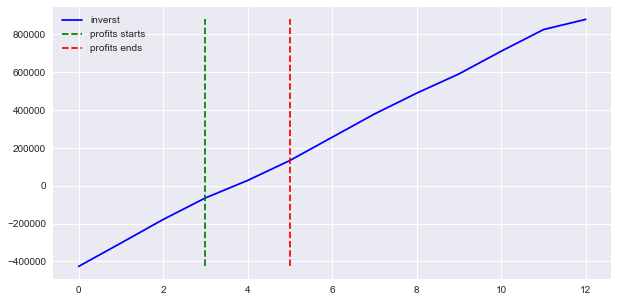

In [170]:
inversion_restante = -(inversion_total)
print('inversión restante:',inversion_restante)
stock_restante = stock + cantidad_condicion
# print('stock restante:', stock_restante)
year_sales = predict_year[0:12]
# print(year_sales)

ganancias = []
invests = [inversion_restante]
month1 = 0
month2 = 0
for cant in year_sales:
    stock_restante = stock_restante - cant
    # print('stock_restante',stock_restante)
    posibles_ventas = cant * predict_sale_sug[0]
    # print('posibles_ventas',posibles_ventas)
    inversion_restante = inversion_restante + posibles_ventas
    # print(int(inversion_restante))
    invests.append(int(inversion_restante))
    # print('inversion restante',inversion_restante)
    if inversion_restante > 0:
        if stock_restante > 0:
            # print('posibleas ventas', posibles_ventas)
            ganancias.append(posibles_ventas)
            month2 = month2 + 1
    else: 
        month1 = month1 + 1
        month2 = month2 + 1


if len(ganancias) > 0:
    ganancias = ganancias[0].sum()
    print('ganancias', ganancias)
    ganancias_sobre_ahorro = ganancias - ahorro_total
    print('ganancias sobre ahorro:', ganancias_sobre_ahorro)
    if ganancias_sobre_ahorro > 0 :
        print('La oferta es conveniente')
        margen_ganancias = (ahorro_total * 100)/ganancias
        print('ganancias de:', margen_ganancias,'%')
    else:
        print('Solicita más descuento')
else:
    print('La condición de compra es alta')


plt.figure(figsize=(10,5))
plt.plot( invests, 'b-', label='inverst');
plt.plot( [month1,month1], [invests[0], invests[len(invests)-1]], 'g--', label='profits starts');
plt.plot( [month2,month2], [invests[0], invests[len(invests)-1]], 'r--', label='profits ends');
plt.legend();
# plt.stem(month_when_cant_is_cero)